<a href="https://colab.research.google.com/github/maheshsk78/ESG_TextMining/blob/main/financial_service2_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loading Data

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls /content/drive/'Shared drives'/ELP_Hyrdus_GroupWork/'WRDS - 10K'/

consumer_financials.xlsx     financial_services.xlsx
diversified_financials.xlsx  WRDS_SEC_Readability_and_Sentiment_Manual.pdf
financial_services.csv


In [ ]:
import pandas as pd
from matplotlib import pyplot
from scipy import stats

In [ ]:
df_financial = pd.read_excel("/content/drive/Shared drives/ELP_Hyrdus_GroupWork/WRDS - 10K/financial_services.xlsx")

In [ ]:
df_financial.head(3)

,CIK,FDATE,F_date,Form,CoName,SECFNAME,FNAME,FSIZE,Flesch_Reading_Ease,Flesch_Kincaid_Grade_Level,RIX,Coleman_Liau_Index,Gunning_Fog_Index,ARI,SMOG_Index,LIX,ParagraphCount,CharCount_raw,averageWordsPerSentence,CharCountTokens_raw,CharCount,WordCount,SyllableCount,ComplexWordCount,SentenceCount,averageWordsPerParagraph,CharCountTokens,FinTerms_Negative,FinTerms_ModalWeak_count,FinTerms_ModalStrong_count,FinTerms_Positive,HarvardIV_Negative,FinTerms_Litigious_count,FinTerms_Uncertainty_count,FinTerms_ModalWeak,FinTerms_Litigious,LM_Master_Dictionary,FinTerms_Uncertainty,LM_Master_Dictionary_count,HarvardIV_Negative_count,FinTerms_Negative_count,FinTerms_ModalStrong,FinTerms_Positive_count,TICKERH
F_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-06-10,4962,20150610,2015-06-10,SC 13G/A,AMERICAN EXPRESS CO,edgar/data/4962/0000215457-15-000599.txt,000000/4962/0000215457-15-000599.txt,12562,12.180340,23.865358,14.21875,23.478814,27.787263,35.277448,21.081127,78.237875,1.0,10622.0,49.531250,7895.0,10749.0,1585.0,2705.0,316.0,32.0,1547.0000,7780.0,0.014615,6.0,3.0,0.006923,0.023846,40.0,6.0,0.004615,0.030769,1.0,0.004615,1300.0,31.0,19.0,0.002308,9.0,AXP
2014-07-02,4962,20140702,2014-07-02,4,AMERICAN EXPRESS CO,edgar/data/4962/0001127602-14-022315.txt,000000/4962/0001127602-14-022315.txt,5594,-426.616049,163.936730,186.00000,53.013079,162.930790,217.255286,72.627658,417.681199,1.0,5423.0,367.000000,3796.0,4300.0,367.0,1132.0,148.0,1.0,198.0000,3794.0,0.005988,0.0,1.0,0.000000,0.017964,1.0,0.0,0.000000,0.005988,1.0,0.000000,167.0,3.0,1.0,0.005988,0.0,AXP
2016-03-15,4962,20160315,2016-03-15,8-K,AMERICAN EXPRESS CO,edgar/data/4962/0000004962-16-000138.txt,000000/4962/0000004962-16-000138.txt,63839,33.682941,14.465536,7.50000,21.450827,18.651127,21.289631,16.445233,55.323469,16.0,4988.0,23.766667,4113.0,4668.0,713.0,1256.0,163.0,30.0,40.8125,3746.0,0.004518,2.0,0.0,0.004518,0.012048,6.0,2.0,0.003012,0.009036,1.0,0.003012,664.0,8.0,3.0,0.000000,3.0,AXP


#Cleaning the Data

In [ ]:
df_financial.set_index(df_financial.F_date, inplace=True)
#df_financial.head(1)
df_new1=df_financial[df_financial['Form']=='10-K']
#df_new1.head(1)
y=df_new1[(df_new1.TICKERH == 'CBOE') | (df_new1.TICKERH == 'CME') | (df_new1.TICKERH == 'MCO') | (df_new1.TICKERH == 'MORN') |(df_new1.TICKERH == 'NDAQ') 
         | (df_new1.TICKERH == 'SPGI') | (df_new1.TICKERH == 'ALLY') | (df_new1.TICKERH == 'AXP') |(df_new1.TICKERH == 'COF') | (df_new1.TICKERH == 'DFS') 
         | (df_new1.TICKERH == 'GDOT') |(df_new1.TICKERH == 'PRA') ]
y.head(1)

,CIK,FDATE,F_date,Form,CoName,SECFNAME,FNAME,FSIZE,Flesch_Reading_Ease,Flesch_Kincaid_Grade_Level,RIX,Coleman_Liau_Index,Gunning_Fog_Index,ARI,SMOG_Index,LIX,ParagraphCount,CharCount_raw,averageWordsPerSentence,CharCountTokens_raw,CharCount,WordCount,SyllableCount,ComplexWordCount,SentenceCount,averageWordsPerParagraph,CharCountTokens,FinTerms_Negative,FinTerms_ModalWeak_count,FinTerms_ModalStrong_count,FinTerms_Positive,HarvardIV_Negative,FinTerms_Litigious_count,FinTerms_Uncertainty_count,FinTerms_ModalWeak,FinTerms_Litigious,LM_Master_Dictionary,FinTerms_Uncertainty,LM_Master_Dictionary_count,HarvardIV_Negative_count,FinTerms_Negative_count,FinTerms_ModalStrong,FinTerms_Positive_count,TICKERH
F_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-02-19,4962,20160219,2016-02-19,10-K,AMERICAN EXPRESS CO,edgar/data/4962/0001193125-16-469798.txt,000000/4962/0001193125-16-469798.txt,25795480,20.152677,16.89421,9.892539,22.996039,20.969179,23.533373,18.102284,64.073288,1445.0,641442.0,25.946269,531715.0,633006.0,93199.0,176645.0,24676.0,3592.0,62.626298,517916.0,0.019786,555.0,171.0,0.009203,0.053071,1124.0,1575.0,0.006275,0.012708,1.0,0.017807,88447.0,4694.0,1750.0,0.001933,814.0,AXP


#Visualizations - Readability

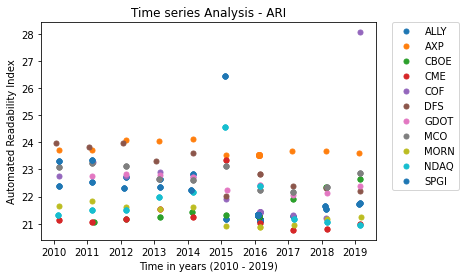

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

groups = y.groupby("TICKERH")

fig, ax = plt.subplots()
#ax.margins(0.5)
for name, group in groups:
    ax.plot(group.F_date, group.ARI, marker='o', linestyle='', ms=5, label=name)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel("Automated Readability Index")
plt.xlabel("Time in years (2010 - 2019)")
plt.title("Time series Analysis - ARI")
plt.show()

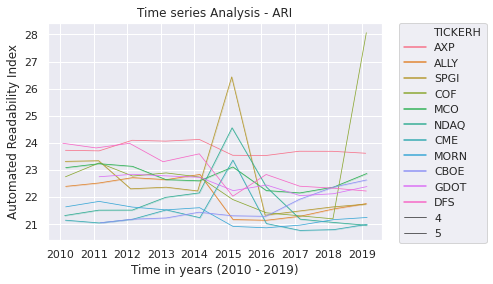

In [ ]:
import seaborn as sns
sns.set(style="darkgrid")
#sns.set(style = "ticks", color_codes = True)
sns.lineplot("F_date", "ARI", data=y, hue="TICKERH", size=5)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel("Automated Readability Index")
plt.xlabel("Time in years (2010 - 2019)")
plt.title("Time series Analysis - ARI")
plt.show()

In [ ]:
from altair import Chart
c = Chart(y)
c.mark_circle().encode(x="F_date", y="ARI", color="TICKERH")

alt.Chart(...)

# Visualization - Sentiment

In [ ]:
#sns.lineplot("F_date","FinTerms_Negative", data=y, hue="TICKERH", size=5)
#sns.lineplot("F_date","FinTerms_Positive", data=y, hue="TICKERH", size=5)
#sns.lineplot("F_date","FinTerms_Litigious", data=y, hue="TICKERH", size=5)
#sns.lineplot("F_date","FinTerms_Uncertainty", data=y, hue="TICKERH", size=5)

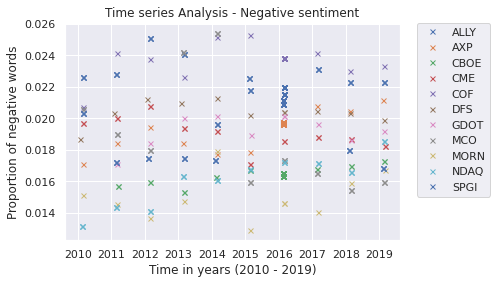

In [ ]:
fig, ax = plt.subplots()
#ax.margins(0.5)
for name, group in groups:
    ax.plot(group.F_date, group.FinTerms_Negative, marker='x', linestyle='', ms=5, label=name)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel("Proportion of negative words")
plt.xlabel("Time in years (2010 - 2019)")
plt.title("Time series Analysis - Negative sentiment")
plt.show()

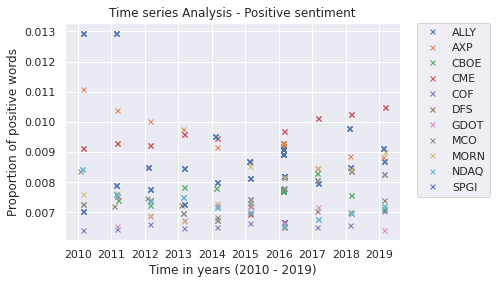

In [ ]:
fig, ax = plt.subplots()
#ax.margins(0.5)
for name, group in groups:
    ax.plot(group.F_date, group.FinTerms_Positive, marker='x', linestyle='', ms=5, label=name)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel("Proportion of positive words")
plt.xlabel("Time in years (2010 - 2019)")
plt.title("Time series Analysis - Positive sentiment")
plt.show()

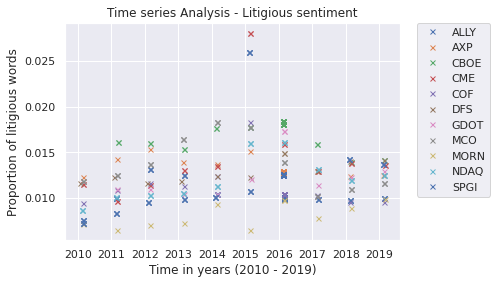

In [ ]:
fig, ax = plt.subplots()
#ax.margins(0.5)
for name, group in groups:
    ax.plot(group.F_date, group.FinTerms_Litigious, marker='x', linestyle='', ms=5, label=name)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel("Proportion of litigious words")
plt.xlabel("Time in years (2010 - 2019)")
plt.title("Time series Analysis - Litigious sentiment")
plt.show()

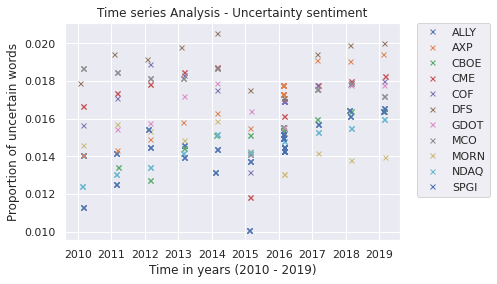

In [ ]:
fig, ax = plt.subplots()
#ax.margins(0.5)
for name, group in groups:
    ax.plot(group.F_date, group.FinTerms_Uncertainty, marker='x', linestyle='', ms=5, label=name)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel("Proportion of uncertain words")
plt.xlabel("Time in years (2010 - 2019)")
plt.title("Time series Analysis - Uncertainty sentiment")
plt.show()